<a href="https://colab.research.google.com/github/sangeethak15-AI/mnist-classification/blob/main/Dlex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

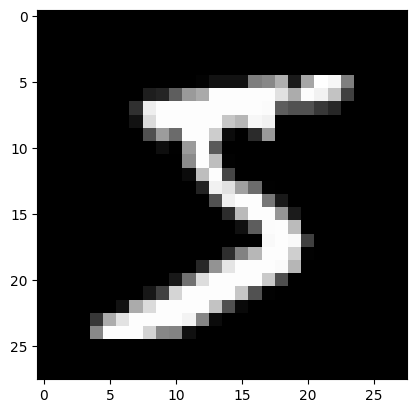

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()


255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

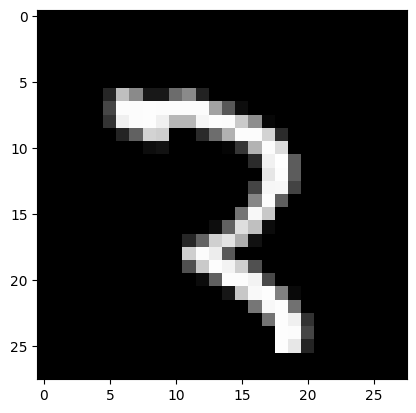

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 46s 46ms/step - loss: 0.2539 - accuracy: 0.9265 - val_loss: 0.0954 - val_accuracy: 0.9713
Epoch 2/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0777 - accuracy: 0.9764 - val_loss: 0.0598 - val_accuracy: 0.9804
Epoch 3/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0551 - accuracy: 0.9832 - val_loss: 0.0512 - val_accuracy: 0.9829
Epoch 4/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0429 - accuracy: 0.9870 - val_loss: 0.0483 - val_accuracy: 0.9834
Epoch 5/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0349 - accuracy: 0.9891 - val_loss: 0.0505 - val_accuracy: 0.9838


Sangeetha 212221230085


<Axes: >

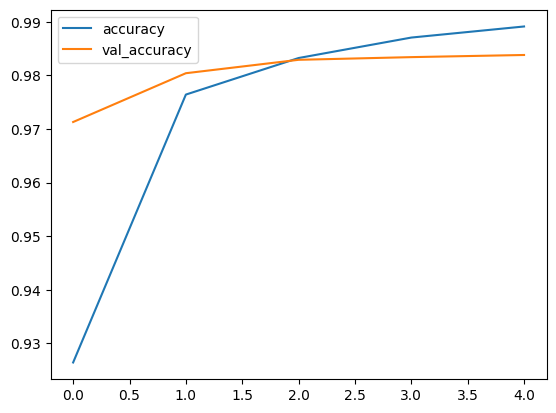

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics.head()
print("Sangeetha 212221230085")
metrics[['accuracy','val_accuracy']].plot()


Sangeetha 212221230085


<Axes: >

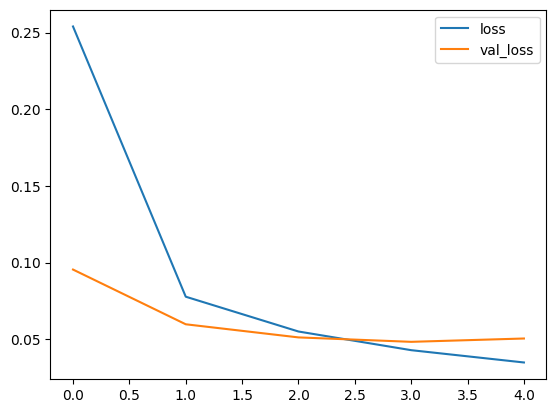

In [ ]:
print("Sangeetha 212221230085")
metrics[['loss','val_loss']].plot()

In [ ]:
print("Sangeetha 212221230085")
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print(confusion_matrix(y_test,x_test_predictions))

Sangeetha 212221230085
313/313 [==============================] - 3s 8ms/step
[[ 972    0    4    0    0    0    1    3    0    0]
 [   0 1127    4    0    1    0    2    0    1    0]
 [   2    2 1022    0    1    0    0    5    0    0]
 [   0    0    6  985    0    7    0   10    2    0]
 [   0    0    0    0  974    0    0    1    1    6]
 [   1    0    0    8    0  882    1    0    0    0]
 [   7    3    2    0    3    5  937    0    1    0]
 [   0    0    6    0    0    0    0 1021    1    0]
 [   5    0   14    0    1    1    0    7  942    4]
 [   2    3    1    1    8    3    0   12    3  976]]


In [ ]:
print("Sangeetha 212221230085")
print(classification_report(y_test,x_test_predictions))

Sangeetha 212221230085
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.96      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
img = image.load_img('/content/five.png')
type(img)

PIL.Image.Image

1/1 [==============================] - 0s 23ms/step


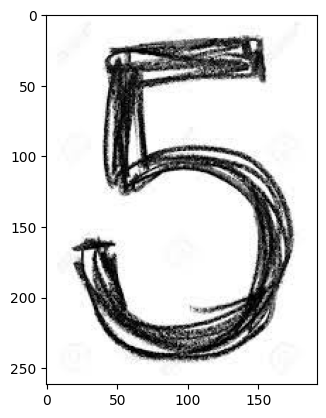

In [ ]:
img = image.load_img('/content/img.jpg')
plt.imshow(img)
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)

Sangeetha 212221230085
[5]


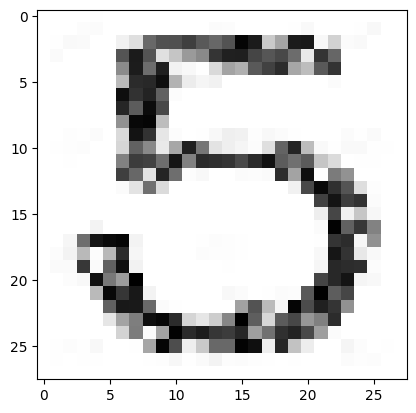

In [ ]:
print("Sangeetha 212221230085")
print(x_single_prediction)
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

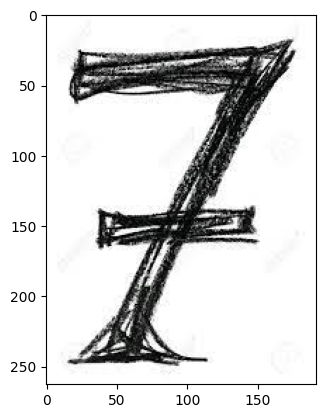

In [ ]:
img1 = image.load_img('img1.jpg')
plt.imshow(img1)
img_tensor1 = tf.convert_to_tensor(np.asarray(img1))
img_28_gray1 = tf.image.resize(img_tensor1,(28,28))
img_28_gray1 = tf.image.rgb_to_grayscale(img_28_gray1)
img_28_gray_inverted1 = 255.0-img_28_gray1
img_28_gray_inverted_scaled1 = img_28_gray_inverted1.numpy()/255.0

1/1 [==============================] - 0s 24ms/step
Sangeetha 212221230085
[7]


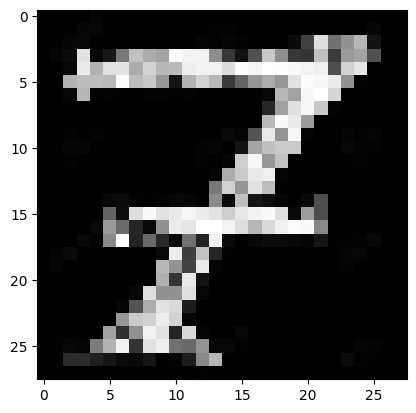

In [ ]:
x_single_prediction1 = np.argmax(model.predict(img_28_gray_inverted_scaled1.reshape(1,28,28,1)),axis=1)
print("Sangeetha 212221230085")
print(x_single_prediction1)
plt.imshow(img_28_gray_inverted_scaled1.reshape(28,28),cmap='gray')